<a href="https://colab.research.google.com/github/thelord1310/Ganant-Git/blob/main/Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

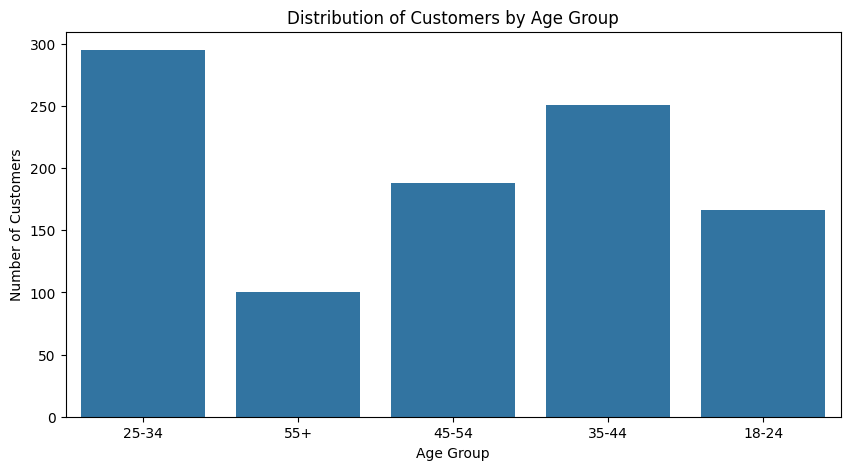

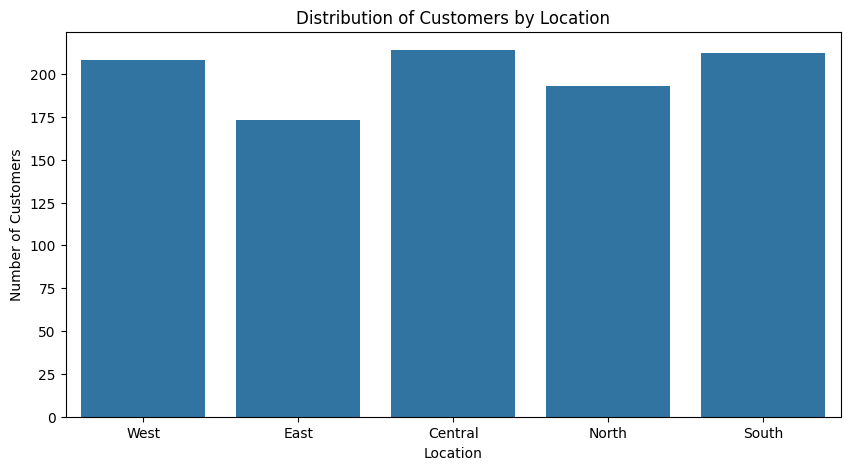

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets
customers = pd.read_csv('/content/drive/MyDrive/Analytics/customers.csv')

# Age group distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='age_group', data=customers)
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

# Location distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='location', data=customers)
plt.title('Distribution of Customers by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
import pandas as pd

# Load transactions dataset
transactions = pd.read_csv('/content/drive/MyDrive/Analytics/transactions.csv')

# Merge customers with transactions to get membership_type in the transactions data
merged_data = pd.merge(transactions, customers, on='customer_id')

# Calculate average purchase value by membership type
avg_purchase_by_membership = merged_data.groupby('membership_type')['total_amount'].mean()

# Convert result to DataFrame for a more formal output
avg_purchase_by_membership_df = avg_purchase_by_membership.reset_index()
avg_purchase_by_membership_df.columns = ['Membership Type', 'Average Purchase Value']

# Display the result in a well-formatted table
print("\nAverage Purchase Value by Membership Type:\n")
print(avg_purchase_by_membership_df.to_string(index=False, float_format="%.2f"))



Average Purchase Value by Membership Type:

Membership Type  Average Purchase Value
         Bronze                  522.97
           Gold                  520.53
       Platinum                  521.51
         Silver                  523.85


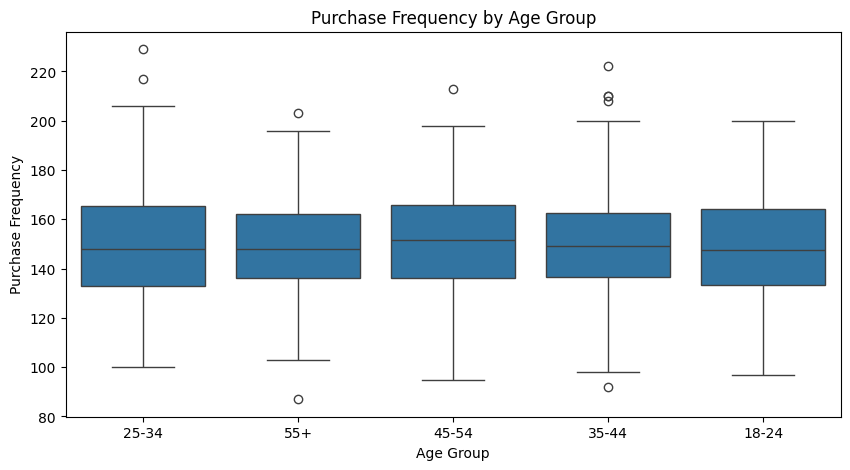

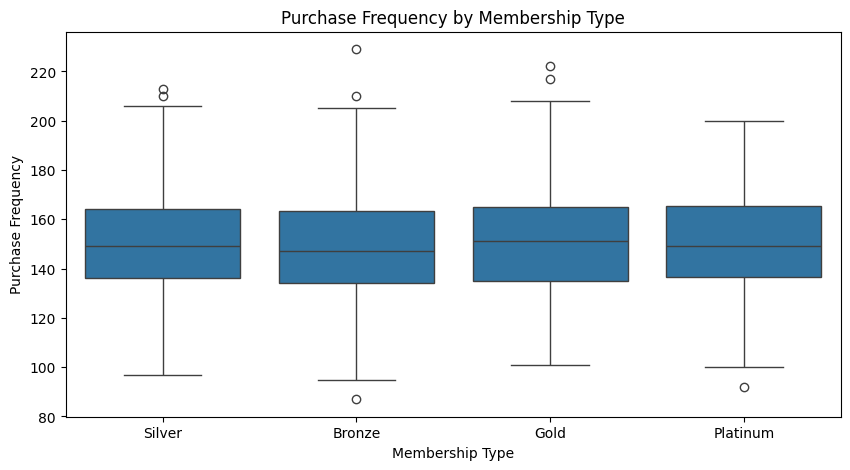

In [ ]:
# Calculate purchase frequency by customer_id
purchase_frequency = merged_data.groupby('customer_id').size().reset_index(name='purchase_count')

# Merge back to get age group and membership type
purchase_frequency = pd.merge(purchase_frequency, customers[['customer_id', 'age_group', 'membership_type']], on='customer_id')

# Analyze purchase frequency by age group
plt.figure(figsize=(10, 5))
sns.boxplot(x='age_group', y='purchase_count', data=purchase_frequency)
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Frequency')
plt.show()

# Analyze purchase frequency by membership type
plt.figure(figsize=(10, 5))
sns.boxplot(x='membership_type', y='purchase_count', data=purchase_frequency)
plt.title('Purchase Frequency by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Purchase Frequency')
plt.show()


In [ ]:
# Encode the membership_type as numeric using a mapping
membership_mapping = {'Bronze': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
merged_data['membership_numeric'] = merged_data['membership_type'].map(membership_mapping)

# Calculate the correlation between membership type and total_amount
correlation = merged_data[['membership_numeric', 'total_amount']].corr()

print(correlation)



                    membership_numeric  total_amount
membership_numeric            1.000000     -0.002073
total_amount                 -0.002073      1.000000


"There is a negative correlation, suggesting that higher membership types may spend less on average."

**2. Product Performance Analysis**

Top 10 Products by Revenue:
    total_amount  quantity       category
86  1,514,654.53      3203         Sports
6   1,508,405.88      3025    Electronics
20  1,487,267.01      3018       Clothing
45  1,485,426.29      2995  Home & Garden
31  1,479,998.28      2999       Clothing
11  1,454,971.88      2982    Electronics
59  1,401,003.83      2942  Home & Garden
85  1,384,870.77      3003         Sports
49  1,384,409.16      3105  Home & Garden
58  1,380,931.50      3051  Home & Garden

Top 10 Products by Quantity Sold:
    total_amount  quantity       category
86  1,514,654.53      3203         Sports
76     70,811.70      3166          Books
39    300,444.69      3150       Clothing
18    146,426.58      3138    Electronics
24    368,499.62      3132       Clothing
44    910,045.05      3123  Home & Garden
38    984,853.13      3119       Clothing
74  1,320,251.99      3113          Books
49  1,384,409.16      3105  Home & Garden
16    286,740.95      3104    Electronics


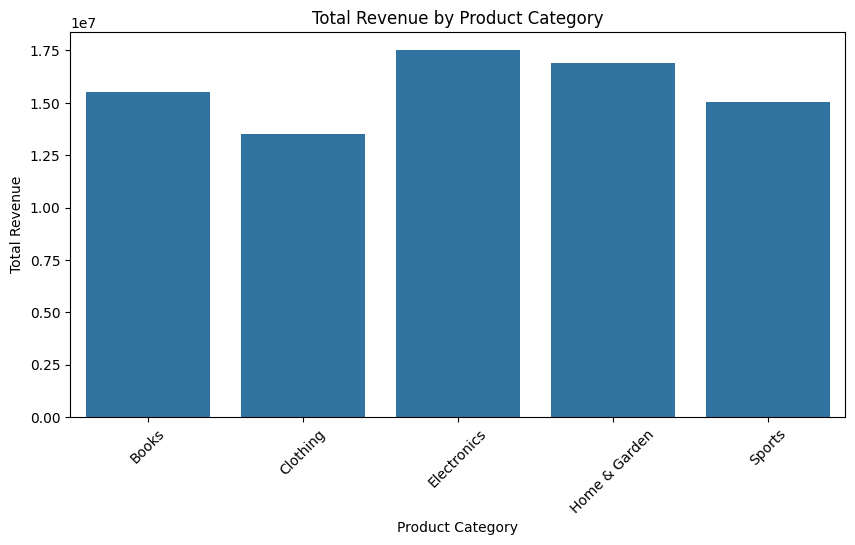

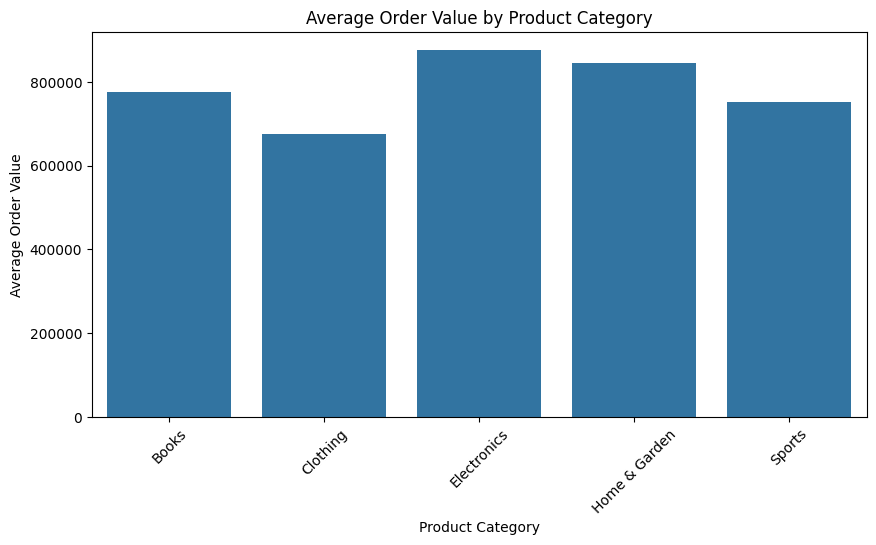

Products with Low Stock Levels:
    total_amount  quantity       category  stock_level
1   1,039,375.90      2983    Electronics            6
42    644,061.99      2994  Home & Garden            8
70    580,032.27      3023          Books            5


In [ ]:
import pandas as pd

# Load datasets
products = pd.read_csv('/content/drive/MyDrive/Analytics/products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Analytics/transactions.csv')
customers = pd.read_csv('/content/drive/MyDrive/Analytics/customers.csv')
# Calculate total revenue and quantity sold for each product
product_performance = transactions.groupby('product_id').agg({
    'total_amount': 'sum',  # Total revenue
    'quantity': 'sum'       # Total quantity sold
}).reset_index()

# Merge with the products data to get product details (category)
product_performance = pd.merge(product_performance, products[['product_id', 'category']], on='product_id')

# Top 10 products by revenue (still numeric)
top_revenue_products = product_performance.nlargest(10, 'total_amount').drop(columns=['product_id'])

# Top 10 products by quantity sold (still numeric)
top_quantity_products = product_performance.nlargest(10, 'quantity').drop(columns=['product_id'])

# Format total_amount with commas for display (only after nlargest)
top_revenue_products['total_amount'] = top_revenue_products['total_amount'].apply(lambda x: f"{x:,.2f}")
top_quantity_products['total_amount'] = top_quantity_products['total_amount'].apply(lambda x: f"{x:,.2f}")

# Print results
print("Top 10 Products by Revenue:")
print(top_revenue_products)

print("\nTop 10 Products by Quantity Sold:")
print(top_quantity_products)



# Analyze revenue by product category
category_performance = product_performance.groupby('category').agg({'total_amount': 'sum', 'quantity': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='total_amount', data=category_performance)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


# Calculate average order value (AOV) by category
aov_by_category = product_performance.groupby('category')['total_amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='total_amount', data=aov_by_category)
plt.title('Average Order Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()



# Calculate total revenue and quantity sold for each product
product_performance = transactions.groupby('product_id').agg({
    'total_amount': 'sum',  # Total revenue
    'quantity': 'sum'       # Total quantity sold
}).reset_index()

# Merge with the products data to get product details (category and stock level)
product_performance = pd.merge(product_performance, products[['product_id', 'category', 'stock_level']], on='product_id')

# Define a threshold for low stock (e.g., products with stock levels below 10)
low_stock_threshold = 10

# Filter products with low stock levels
low_stock_products = product_performance[product_performance['stock_level'] < low_stock_threshold]


# Calculate total revenue and quantity sold for each product
product_performance = transactions.groupby('product_id').agg({
    'total_amount': 'sum',  # Total revenue
    'quantity': 'sum'       # Total quantity sold
}).reset_index()

# Merge with the products data to get product details (category and stock level)
product_performance = pd.merge(product_performance, products[['product_id', 'category', 'stock_level']], on='product_id')

# Define a threshold for low stock (e.g., products with stock levels below 10)
low_stock_threshold = 10

# Filter products with low stock levels
low_stock_products = product_performance[product_performance['stock_level'] < low_stock_threshold]

# Drop the 'product_id' column if not needed
low_stock_products_display = low_stock_products.drop(columns=['product_id'])

# Format total_amount with commas and two decimal places for better readability
low_stock_products_display['total_amount'] = low_stock_products_display['total_amount'].apply(lambda x: f"{x:,.2f}")

# Display the products with low stock levels in a more readable format
print("Products with Low Stock Levels:")
print(low_stock_products_display)



**3. Temporal Analysis**

Products Data:
   product_id     category       price  stock_level
0           1  Electronics  441.676773          143
1           2  Electronics  348.433088            6
2           3  Electronics  255.772093          186
3           4  Electronics  444.185783          175
4           5  Electronics  193.966144           87

Transactions Data:
   transaction_id  customer_id  product_id        date  quantity       price  \
0               1          471          57  2024-04-21         1  352.280006   
1               2          367          99  2023-10-25         3  338.315944   
2               3          367          80  2023-10-25         1  378.321324   
3               4          367          15  2023-10-25         1  280.419797   
4               5          367          78  2023-10-25         1  116.921692   

  payment_method  total_amount  
0     Debit Card    352.280006  
1     Debit Card   1014.947831  
2  Bank Transfer    378.321324  
3    Credit Card    280.419797  
4    Cr

<ipython-input-29-d5c937abed06>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_amount', y='category', data=sales_by_category, palette='viridis')


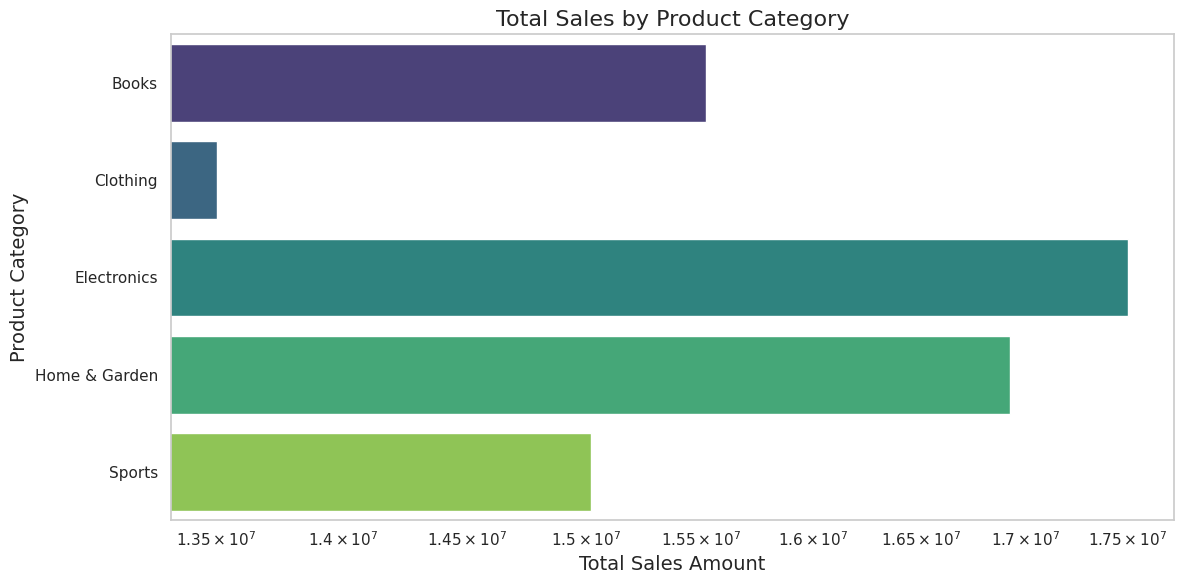

<ipython-input-29-d5c937abed06>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='age_group', palette='pastel')


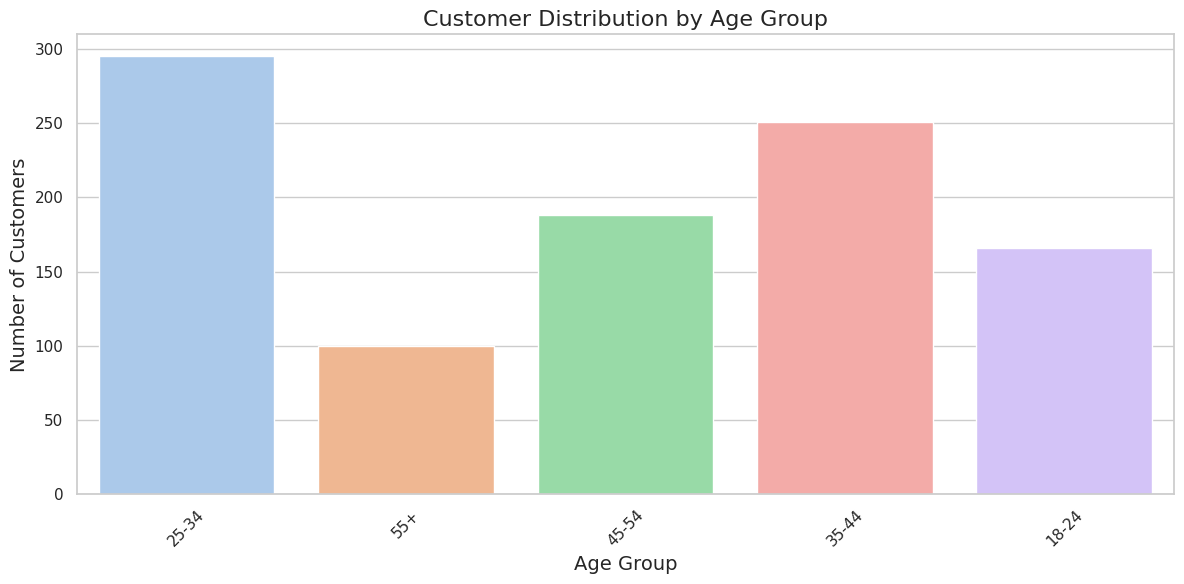

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
products = pd.read_csv('/content/drive/MyDrive/Analytics/products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Analytics/transactions.csv')
customers = pd.read_csv('/content/drive/MyDrive/Analytics/customers.csv')

# Display the first few rows of each dataframe to understand their structure
print("Products Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())
print("\nCustomers Data:")
print(customers.head())

# Check the columns in each DataFrame
print("\nProducts Columns:", products.columns)
print("Transactions Columns:", transactions.columns)
print("Customers Columns:", customers.columns)

# Example 1: Total Sales by Product Category
# Merge transactions with products to get category info
sales_data = transactions.merge(products, on='product_id', how='left')

# Check the columns in the merged DataFrame
print("\nSales Data After Merge:")
print(sales_data.head())
print("Sales Data Columns:", sales_data.columns)

# Ensure 'category' and 'total_amount' exist in the merged DataFrame
if 'category' in sales_data.columns and 'total_amount' in sales_data.columns:
    sales_by_category = sales_data.groupby('category')['total_amount'].sum().reset_index()

    # Set the visual style
    sns.set(style="whitegrid")

    # Create a bar plot for total sales by product category
    plt.figure(figsize=(12, 6))
    sns.barplot(x='total_amount', y='category', data=sales_by_category, palette='viridis')
    plt.title('Total Sales by Product Category', fontsize=16)
    plt.xlabel('Total Sales Amount', fontsize=14)
    plt.ylabel('Product Category', fontsize=14)
    plt.xscale('log')  # Using a logarithmic scale
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required columns 'category' or 'total_amount' not found in sales data.")

# Example 2: Customer Age Group Distribution
# Create a count plot for the distribution of customer age groups
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, x='age_group', palette='pastel')
plt.title('Customer Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Print dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

# Separate features and target
features = data.drop("class", axis=1)
target = data["class"]

# Print dimensions of the feature set and target variable
print("Dimensions of the feature set:", features.shape)
print("Dimensions of the target variable:", target.shape)


Dimensions of the dataset: (150, 5)
Dimensions of the feature set: (150, 4)
Dimensions of the target variable: (150,)


Number of non-numeric total_amount: 0


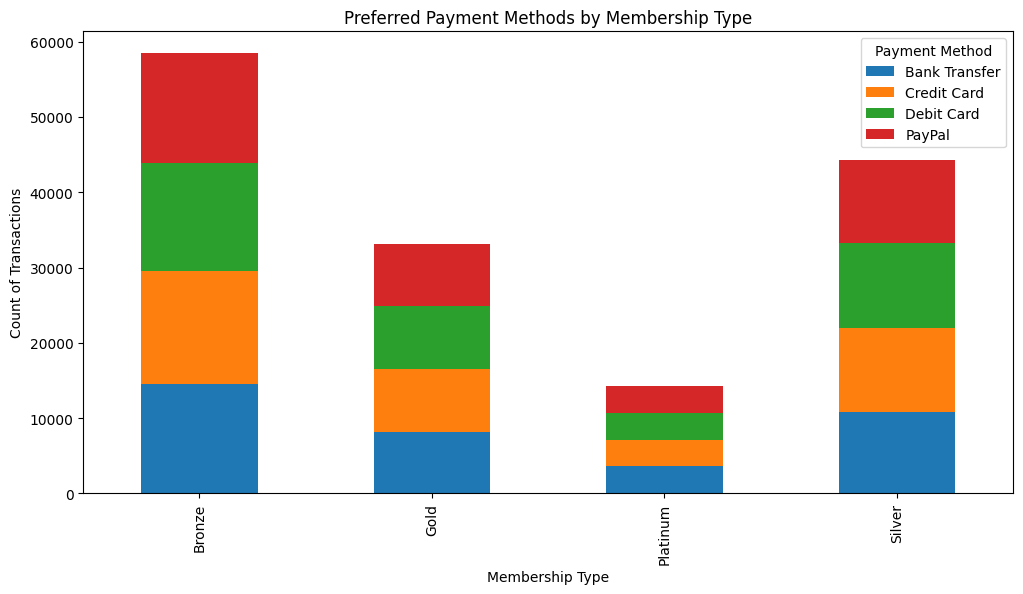

<ipython-input-2-fafbc54d06c2>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='avg_transaction_value', y='payment_method', data=avg_transaction_values, palette='Blues_d', ci=None)
<ipython-input-2-fafbc54d06c2>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_transaction_value', y='payment_method', data=avg_transaction_values, palette='Blues_d', ci=None)


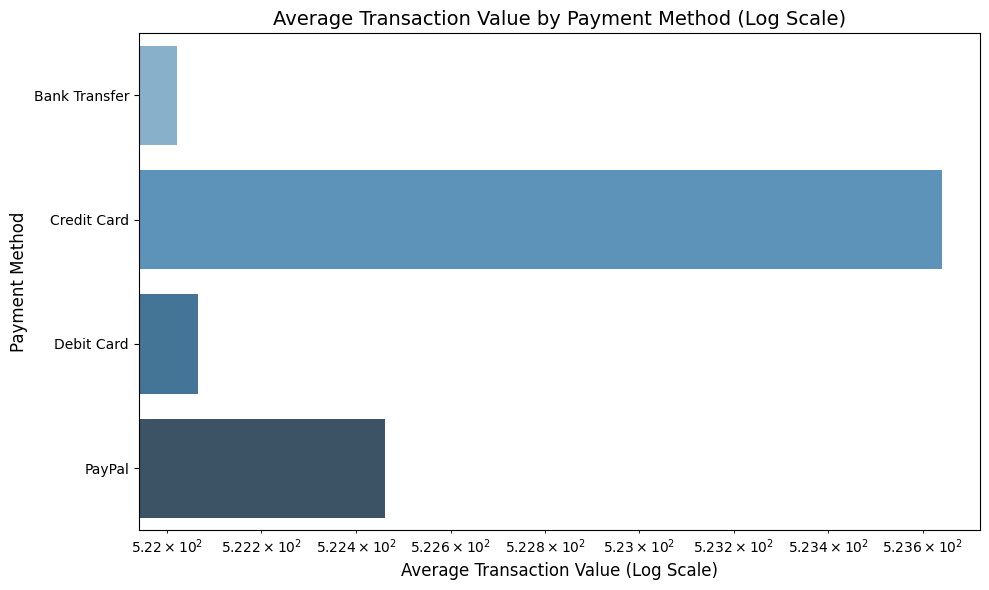

Payment Trends DataFrame:
payment_method  Bank Transfer   Credit Card    Debit Card        PayPal
month_year                                                             
2023-10          3.503516e+05  3.753211e+05  3.915954e+05  3.630295e+05
2023-11          1.664226e+06  1.655480e+06  1.681680e+06  1.619990e+06
2023-12          1.672307e+06  1.771908e+06  1.645123e+06  1.653727e+06
2024-01          1.586773e+06  1.607151e+06  1.580583e+06  1.637884e+06
2024-02          1.459091e+06  1.513365e+06  1.527175e+06  1.549513e+06
2024-03          1.663230e+06  1.678466e+06  1.685041e+06  1.741232e+06
2024-04          1.558237e+06  1.545310e+06  1.541360e+06  1.572184e+06
2024-05          1.689763e+06  1.707781e+06  1.759989e+06  1.659964e+06
2024-06          1.585480e+06  1.664923e+06  1.635730e+06  1.579642e+06
2024-07          1.656327e+06  1.664436e+06  1.654381e+06  1.690283e+06
2024-08          1.681776e+06  1.699970e+06  1.635310e+06  1.706948e+06
2024-09          1.596342e+06  1.61903

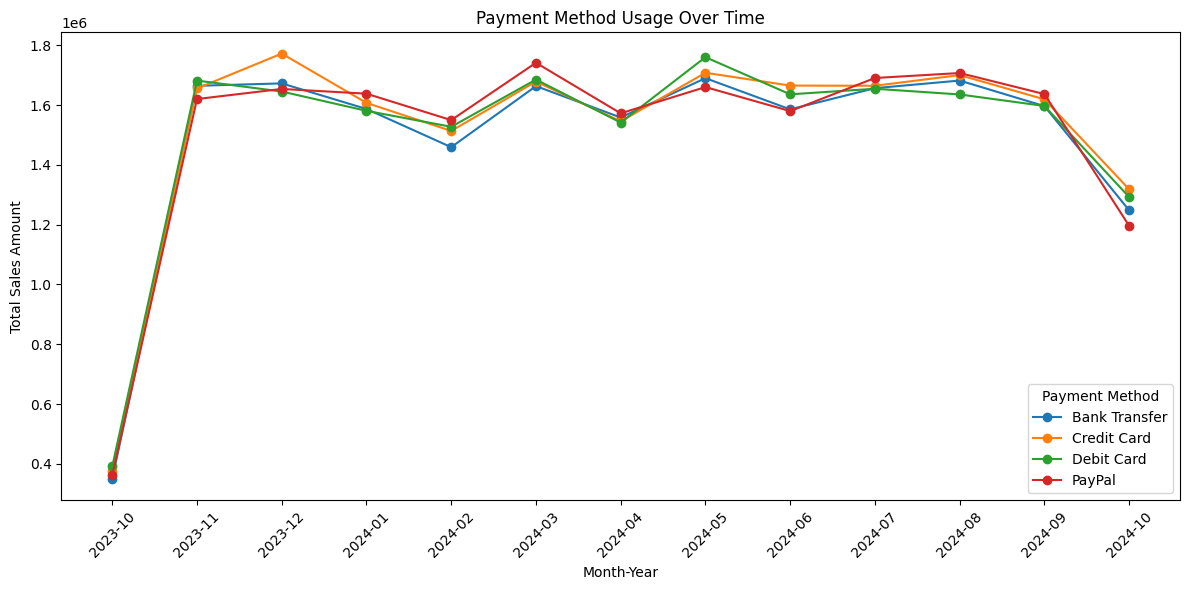

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
products = pd.read_csv('/content/drive/MyDrive/Analytics/products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Analytics/transactions.csv')
customers = pd.read_csv('/content/drive/MyDrive/Analytics/customers.csv')

# Merge transactions with products and customers to create merged_data
merged_data = transactions.merge(products, on='product_id', how='left') \
                           .merge(customers, on='customer_id', how='left')

# Ensure total_amount is numeric
merged_data['total_amount'] = pd.to_numeric(merged_data['total_amount'], errors='coerce')

# Check for any rows that could not be converted to numeric
print("Number of non-numeric total_amount:", merged_data['total_amount'].isna().sum())

# Create month_year column for trends
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['month_year'] = merged_data['date'].dt.to_period('M')

# Preferred payment methods by membership type
payment_methods = merged_data.groupby(['membership_type', 'payment_method']).size().unstack().fillna(0)

# Plot preferred payment methods
payment_methods.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Preferred Payment Methods by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Count of Transactions')
plt.legend(title='Payment Method')
plt.show()

# Step 6: Analyze Average Transaction Value by Payment Method
# Ensure 'total_amount' is numeric
transactions['total_amount'] = pd.to_numeric(transactions['total_amount'], errors='coerce')

# Group by payment method and calculate the mean transaction value
avg_transaction_values = transactions.groupby('payment_method').agg(
    avg_transaction_value=('total_amount', 'mean')
).reset_index()

# Remove any NaN or invalid values that may have occurred during the conversion process
avg_transaction_values = avg_transaction_values.dropna()

# Plot Average Transaction Value by Payment Method using Horizontal Barplot and Log Scale
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_transaction_value', y='payment_method', data=avg_transaction_values, palette='Blues_d', ci=None)

# Set to a logarithmic scale if values are widely distributed
plt.xscale('log')

# Adjust title and labels
plt.title('Average Transaction Value by Payment Method (Log Scale)', fontsize=14)
plt.xlabel('Average Transaction Value (Log Scale)', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


# Payment method trends over time
payment_trends = merged_data.groupby(['month_year', 'payment_method'])['total_amount'].sum().unstack()

# Debugging: Inspect the payment_trends DataFrame
print("Payment Trends DataFrame:")
print(payment_trends)

# Check for NaN values in payment_trends
print("NaN values in payment_trends:")
print(payment_trends.isna().sum())

# Plotting payment trends using plt.plot() as an alternative
plt.figure(figsize=(12, 6))

for column in payment_trends.columns:
    plt.plot(payment_trends.index.astype(str), payment_trends[column], marker='o', label=column)

plt.title('Payment Method Usage Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
